# **Import Library**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV, train_test_split, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# **Load Data**

In [ ]:
# Load dataset
data = pd.read_csv('alzheimers_disease_data.csv')
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PatientID                  2149 non-null   int64  
 1   Age                        2149 non-null   int64  
 2   Gender                     2149 non-null   int64  
 3   Ethnicity                  2149 non-null   int64  
 4   EducationLevel             2149 non-null   int64  
 5   BMI                        2149 non-null   float64
 6   Smoking                    2149 non-null   int64  
 7   AlcoholConsumption         2149 non-null   float64
 8   PhysicalActivity           2149 non-null   float64
 9   DietQuality                2149 non-null   float64
 10  SleepQuality               2149 non-null   float64
 11  FamilyHistoryAlzheimers    2149 non-null   int64  
 12  CardiovascularDisease      2149 non-null   int64  
 13  Diabetes                   2149 non-null   int64

# **Pre-Processing**

In [ ]:
# Check for missing values
print("Missing values per column:")
print(data.isnull().sum())

Missing values per column:
PatientID                    0
Age                          0
Gender                       0
Ethnicity                    0
EducationLevel               0
BMI                          0
Smoking                      0
AlcoholConsumption           0
PhysicalActivity             0
DietQuality                  0
SleepQuality                 0
FamilyHistoryAlzheimers      0
CardiovascularDisease        0
Diabetes                     0
Depression                   0
HeadInjury                   0
Hypertension                 0
SystolicBP                   0
DiastolicBP                  0
CholesterolTotal             0
CholesterolLDL               0
CholesterolHDL               0
CholesterolTriglycerides     0
MMSE                         0
FunctionalAssessment         0
MemoryComplaints             0
BehavioralProblems           0
ADL                          0
Confusion                    0
Disorientation               0
PersonalityChanges           0
DifficultyCo

In [ ]:
# Menghilangkan nilai yang hilang
data = data.dropna()

In [ ]:
# Menghilangkan data duplikat
data = data.drop_duplicates()
print(data.describe())

         PatientID          Age       Gender    Ethnicity  EducationLevel  \
count  2149.000000  2149.000000  2149.000000  2149.000000     2149.000000   
mean   5825.000000    74.908795     0.506282     0.697534        1.286645   
std     620.507185     8.990221     0.500077     0.996128        0.904527   
min    4751.000000    60.000000     0.000000     0.000000        0.000000   
25%    5288.000000    67.000000     0.000000     0.000000        1.000000   
50%    5825.000000    75.000000     1.000000     0.000000        1.000000   
75%    6362.000000    83.000000     1.000000     1.000000        2.000000   
max    6899.000000    90.000000     1.000000     3.000000        3.000000   

               BMI      Smoking  AlcoholConsumption  PhysicalActivity  \
count  2149.000000  2149.000000         2149.000000       2149.000000   
mean     27.655697     0.288506           10.039442          4.920202   
std       7.217438     0.453173            5.757910          2.857191   
min      15.00

In [ ]:
# Asumsikan kolom terakhir adalah label
X = data.drop(columns=['PatientID', 'DoctorInCharge', 'Diagnosis'])
y = data['Diagnosis']

# **Pembagian Data**

In [ ]:
# Membagi data dengan rasio 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Standarisasi fitur agar model bekerja lebih baik
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# **Naive Bayes**

In [ ]:
# Definisikan model Naive Bayes
model = GaussianNB()

In [ ]:
# K-Fold Cross Validation
k = 10
kfold = KFold(n_splits=k, shuffle=True, random_state=42)

In [ ]:
# Evaluasi model menggunakan cross_val_score
scores = cross_val_score(model, X, y, cv=kfold)

In [ ]:
# Latih model pada set pelatihan
model.fit(X_train, y_train)

GaussianNB()

In [ ]:
# Hasil prediksi
y_pred = model.predict(X_test)

In [ ]:
# Tampilkan Classification Report dan Accuracy
print(classification_report(y_test, y_pred))
print('Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87       277
           1       0.79      0.73      0.76       153

    accuracy                           0.83       430
   macro avg       0.82      0.81      0.81       430
weighted avg       0.83      0.83      0.83       430

Model accuracy score: 0.8326


Classification Report Naive Bayes
[[247  30]
 [ 42 111]]


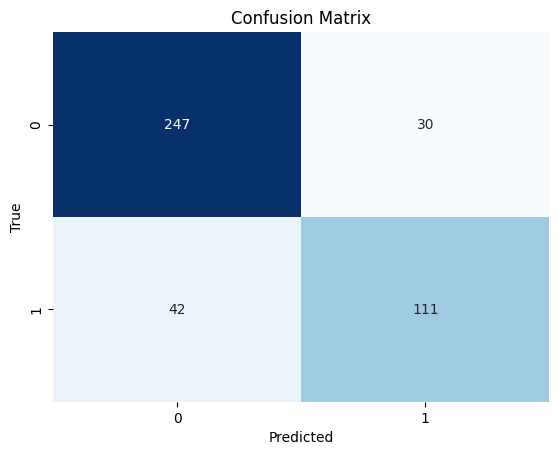

Check for Overfitting and Underfitting
Training set score: 0.8202
Testing set score: 0.8326


In [ ]:
# Tampilkan Confusion Matrix
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(title)
    plt.show()

print("Classification Report Naive Bayes")
print(confusion_matrix(y_test, y_pred))
plot_confusion_matrix(y_test, y_pred, "Confusion Matrix")

print('Check for Overfitting and Underfitting')
print('Training set score: {:.4f}'.format(model.score(X_train, y_train)))
print('Testing set score: {:.4f}'.format(model.score(X_test, y_test)))

# **Grid Search**

Note: Naive Bayes tidak memiliki banyak hyperparameter, jadi optimasi ini opsional

In [ ]:
# Inisialisasi model Naive Bayes
nb = GaussianNB()

In [ ]:
# Setup validasi silang K-fold dengan n_splits=10
kf = KFold(n_splits=10, shuffle=True, random_state=42)

In [ ]:
# Menjalankan GridSearchCV (meskipun Naive Bayes tidak punya banyak parameter untuk diatur)
grid_search = GridSearchCV(estimator=nb, param_grid=param_grid, cv=kf, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

NameError: name 'param_grid' is not defined

In [ ]:
# Mengambil hasil grid search
cv_results = grid_search.cv_results_

In [ ]:
# Menampilkan hasil
print("\nHasil Grid Search Naive Bayes:")
print(cv_results)

In [ ]:
# Menguji model terbaik pada data testing
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

In [ ]:
# Akurasi pada data uji
test_accuracy = best_model.score(X_test, y_test)
print(f"Akurasi pada data uji: {test_accuracy:.4f}")
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: ", grid_search.best_score_)
print("Best estimator: ", grid_search.best_estimator_)

In [ ]:
# Tampilkan Confusion Matrix dan Classification Report
print("Classification Report Naive Bayes setelah Optimasi")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print('Model accuracy score setelah optimasi: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))
plot_confusion_matrix(y_test, y_pred, "Confusion Matrix setelah Optimasi")